<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/fungal_RF(version2_for_testing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float

In [11]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 104 (delta 63), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 39.47 MiB | 11.00 MiB/s, done.
Resolving deltas: 100% (63/63), done.


In [12]:
from google.colab import drive

In [13]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Collect Data

In [18]:
import os
path = os.listdir('/content/drive/MyDrive/Fungal/Training')
classes = {'Early_Blight':0, 'Late_Blight':1}

In [19]:
BATCH_SIZE = 32
IMAGE_SIZE = 200
CHANNELS=2
EPOCHS=50

In [20]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [21]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Fungal/Training',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 800 files belonging to 2 classes.


In [22]:
class_names = dataset.class_names
class_names

['Early_Blight', 'Late_Blight']

In [23]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 200, 200, 3)
[0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0]


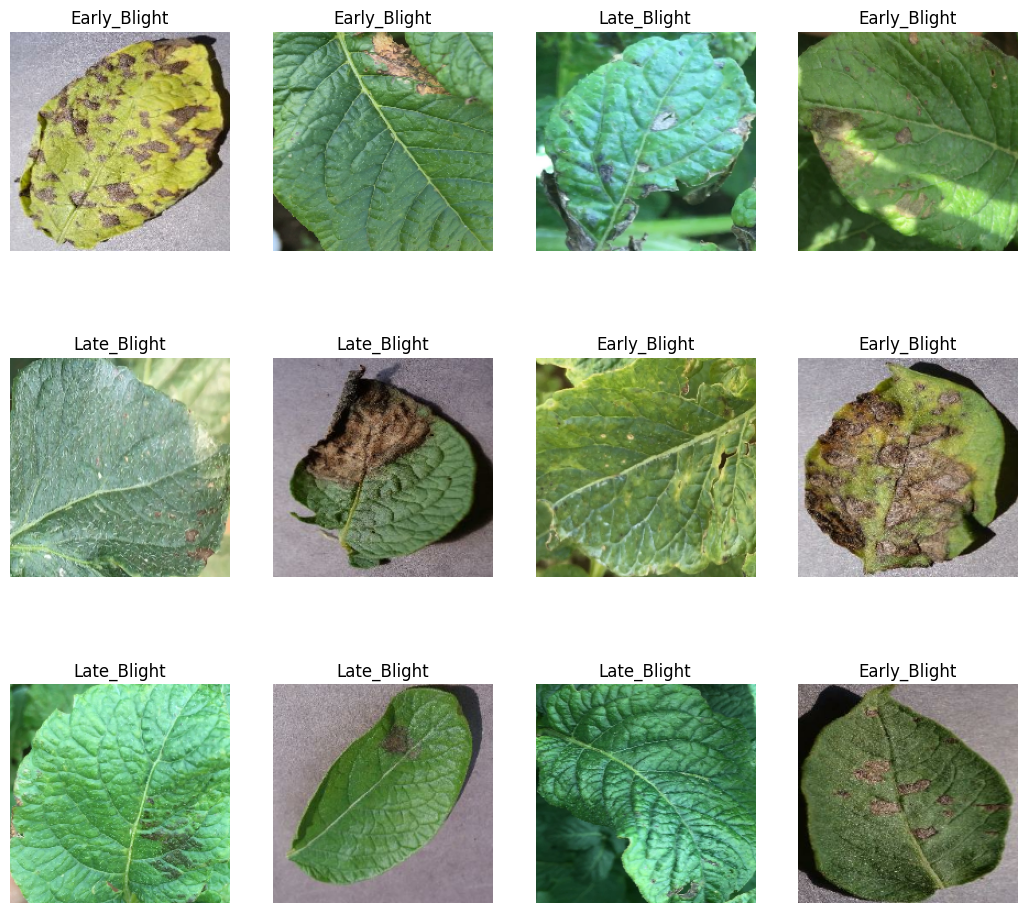

In [26]:
plt.figure(figsize=(13, 12))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [2]:
import os
path = os.listdir('/content/drive/MyDrive/Fungal/Training')
classes = {'Early_Blight':0, 'Late_Blight':1}

In [3]:
import cv2
import numpy as np
from skimage import exposure
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x = []
y = []

for cls in classes:
    pth = '/content/drive/MyDrive/Fungal/Training/' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' + j, 0)
        
        # Image Enhancement using histogram equalization
        img = exposure.equalize_hist(img)
        
        # Image Segmentation using k-means clustering
        img_flat = img.flatten().reshape(-1, 1)
        kmeans = KMeans(n_clusters=2, n_init=10).fit(img_flat)
        img_segmented = kmeans.labels_.reshape(img.shape)
        
        # Feature Extraction using PCA
        pca = PCA(n_components=1)
        img_pca = pca.fit_transform(img_flat)
        
        # Resizing the images
        img_resized = cv2.resize(img, (200, 200))
        
        # Flattening the images into a feature vector
        img_feature = img_resized.flatten()
        
        x.append(img_feature)
        y.append(classes[cls])

# Convert x and y to numpy arrays
x = np.array(x)
y = np.array(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = random_forest.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7375
